In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
df = pd.read_csv('Datasets/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:

X = df.drop(columns=['Species'])  # Features
y = df['Species']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Accuracy: 1.00


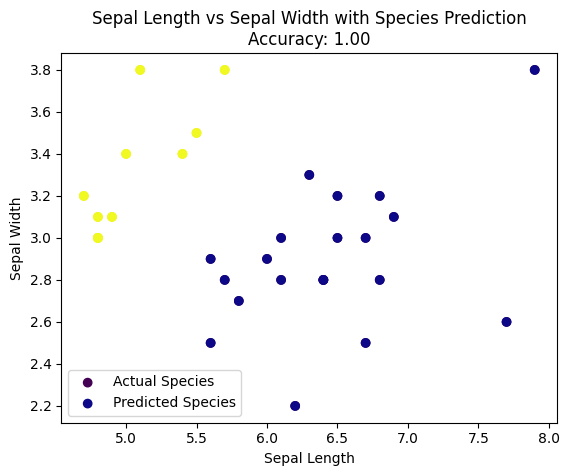

In [40]:
import matplotlib.pyplot as plt

iris = pd.read_csv('Datasets\IRIS_2.csv')

iris['species_binary'] = np.where(iris['species'] == 'Iris-setosa', 1, 0)

X_iris = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_iris = iris['species_binary']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, iterations=100, alpha=0.01):
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    for i in range(iterations):
        z = np.dot(X, w) + b
        h = sigmoid(z)
        dw = (1 / m) * np.dot(X.T, (h - y.reshape(m,)))
        db = (1 / m) * np.sum(h - y.reshape(m,))
        w -= alpha * dw
        b -= alpha * db
    return w, b

def predict(X, w, b):
    z = np.dot(X, w) + b
    h = sigmoid(z)
    return np.where(h >= 0.5, 1, 0)

alpha = 0.01
num_iters = 10000
w_iris, b_iris = logistic_regression(X_train_iris.to_numpy(), y_train_iris.to_numpy(), num_iters, alpha)

predictions_iris = predict(X_test_iris.to_numpy(), w_iris, b_iris)

accuracy_iris = np.mean(predictions_iris == y_test_iris.to_numpy())
print(f"Accuracy: {accuracy_iris:.2f}")

plt.scatter(X_test_iris['sepal_length'], X_test_iris['sepal_width'], c=y_test_iris, cmap='viridis', label='Actual Species')
plt.scatter(X_test_iris['sepal_length'], X_test_iris['sepal_width'], c=predictions_iris, cmap='plasma', marker='o', label='Predicted Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'Sepal Length vs Sepal Width with Species Prediction\nAccuracy: {accuracy_iris:.2f}')
plt.legend()
plt.show()

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = len(y)
    loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    
    for i in range(iterations):
        z = np.dot(X, weights) + bias
        
        y_pred = sigmoid(z)

        
        dw = 1/m * np.dot(X.T, (y_pred - y))  
        db = 1/m * np.sum(y_pred - y)        
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        if i % 100 == 0:
            loss = compute_loss(y, y_pred)
            print(f"Iteration {i}: Loss = {loss}")
    
    return weights, bias

def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return [1 if i > 0.5 else 0 for i in y_pred]

X = df.drop(columns=['Species'])  
y = df['Species'].map({'Iris-setosa' : 1 , 'Iris-versicolor' : 2 , ' Iris-virginica' : 3})
n_features = X_train.shape[1]
weights = np.zeros(n_features)
bias = 0
learning_rate = 0.01
iterations = 1000

weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, iterations)

y_pred = predict(X_test, weights, bias)

accuracy = np.mean(y_pred == y_test) * 100
print(f"Accuracy: {accuracy}%")

Iteration 0: Loss = 0.6931471805599453
Iteration 100: Loss = nan
Iteration 200: Loss = nan
Iteration 300: Loss = nan
Iteration 400: Loss = nan
Iteration 500: Loss = nan
Iteration 600: Loss = nan
Iteration 700: Loss = nan
Iteration 800: Loss = nan
Iteration 900: Loss = nan
Accuracy: 43.333333333333336%


C:\Users\Pradneya Prabhudesai\AppData\Local\Temp\ipykernel_23384\18332324.py:6: RuntimeWarning: divide by zero encountered in log
  loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
C:\Users\Pradneya Prabhudesai\AppData\Local\Temp\ipykernel_23384\18332324.py:6: RuntimeWarning: invalid value encountered in multiply
  loss = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
c:\Users\Pradneya Prabhudesai\miniconda3\envs\ml_pradneya\lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Sure! Let's dive into the **logic** and **mathematics** behind **Logistic Regression**. Unlike linear regression, which predicts a continuous value, logistic regression is used for **classification problems** — specifically for binary classification (e.g., yes/no, 0/1).

### 1. **Why Logistic Regression?**
- In linear regression, the hypothesis is: 
  \[
  h_\theta(x) = \theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n
  \]
  This outputs a continuous value that can range from negative to positive infinity.
  
- For binary classification, however, we need the output to be a **probability** between 0 and 1. Logistic regression transforms this linear output into a probability using a special **sigmoid function**.

### 2. **Sigmoid Function**
The key to logistic regression is the **sigmoid function**, which squashes any real number (linear combination of inputs) into a range between 0 and 1. It’s defined as:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where:
- \(z = \theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n\) is the linear combination of the input features.
  
The **sigmoid function** ensures that:
- If \(z\) is large and positive, \(\sigma(z)\) is close to 1.
- If \(z\) is large and negative, \(\sigma(z)\) is close to 0.

Thus, the logistic regression hypothesis is:

\[
h_\theta(x) = \frac{1}{1 + e^{-(\theta^T x)}}
\]

This outputs a value between 0 and 1, which can be interpreted as the **probability** that the output belongs to class 1.

### 3. **Decision Boundary**
Once we have the probability \(h_\theta(x)\), we can classify the input:
- If \(h_\theta(x) \geq 0.5\), we predict class 1.
- If \(h_\theta(x) < 0.5\), we predict class 0.

This threshold can be adjusted depending on the problem, but 0.5 is the default in binary classification.

### 4. **Cost Function (Log-Loss / Binary Cross-Entropy)**
To train the model, we need a way to measure how well the model is predicting the target values. The cost function for logistic regression is derived from the **likelihood function** (based on maximum likelihood estimation, MLE).

The **logistic cost function** (also called binary cross-entropy or log-loss) is defined as:

\[
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
\]

Where:
- \( m \) is the number of training examples.
- \( y^{(i)} \) is the actual label for example \(i\).
- \( h_\theta(x^{(i)}) \) is the predicted probability for example \(i\).

### **Why this cost function?**
The cost function penalizes:
- High predicted probabilities for the wrong class (e.g., predicting a high probability for class 1 when the true label is 0).
- Low predicted probabilities for the correct class.

### 5. **Gradient Descent for Logistic Regression**
To minimize the cost function and find the optimal values of the parameters \(\theta\), we use **gradient descent**.

Gradient descent iteratively updates the parameters using the following rule:

\[
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
\]

Where:
- \(\alpha\) is the learning rate (step size).
- \(\frac{\partial J(\theta)}{\partial \theta_j}\) is the derivative (gradient) of the cost function with respect to \(\theta_j\).

For logistic regression, the gradient of the cost function with respect to the parameters \(\theta_j\) is:

\[
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
\]

This gradient tells us how to adjust the parameters to minimize the cost. The parameters are updated by moving in the direction that reduces the cost function.

### 6. **Final Prediction**
After training, you can make predictions by calculating \( h_\theta(x) \) and applying the decision rule:
- If \( h_\theta(x) \geq 0.5 \), predict 1.
- Otherwise, predict 0.

### Example of Logistic Regression Flow:

1. **Initialization**: Start with random weights.
2. **Hypothesis**: Compute \( h_\theta(x) = \frac{1}{1 + e^{-(\theta^T x)}} \).
3. **Cost Calculation**: Use the binary cross-entropy cost function to measure the error.
4. **Update Parameters**: Apply gradient descent to minimize the cost function by adjusting the weights.
5. **Repeat**: Continue iterating until the cost converges to a minimum.
6. **Make Predictions**: Use the learned parameters to classify new data.

---

### Example: Visual Understanding
Here’s a diagram explaining the core ideas:
1. **Sigmoid Curve**: The curve squashes the values to range between 0 and 1.
   ![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

2. **Decision Boundary**: The separation between class 0 and class 1, where the probability equals 0.5.
   ![Decision Boundary](https://www.analyticsvidhya.com/wp-content/uploads/2015/11/logistic_regression.png)

---

### Summary of Key Concepts:
- **Sigmoid Function**: Maps real-valued inputs to probabilities.
- **Cost Function**: Measures how far the predicted probabilities are from the actual labels.
- **Gradient Descent**: Minimizes the cost function by adjusting the model’s parameters.
- **Decision Boundary**: The point at which the predicted probability equals 0.5, separating class 0 from class 1.

Would you like a deeper explanation on any specific part?